<a href="https://colab.research.google.com/github/pmama/DeepLearningConcepts/blob/main/IMDB_RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Movie Review Sentiment Analysis (Many to one):**

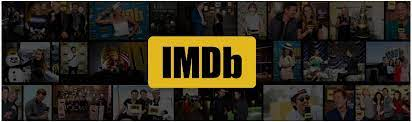

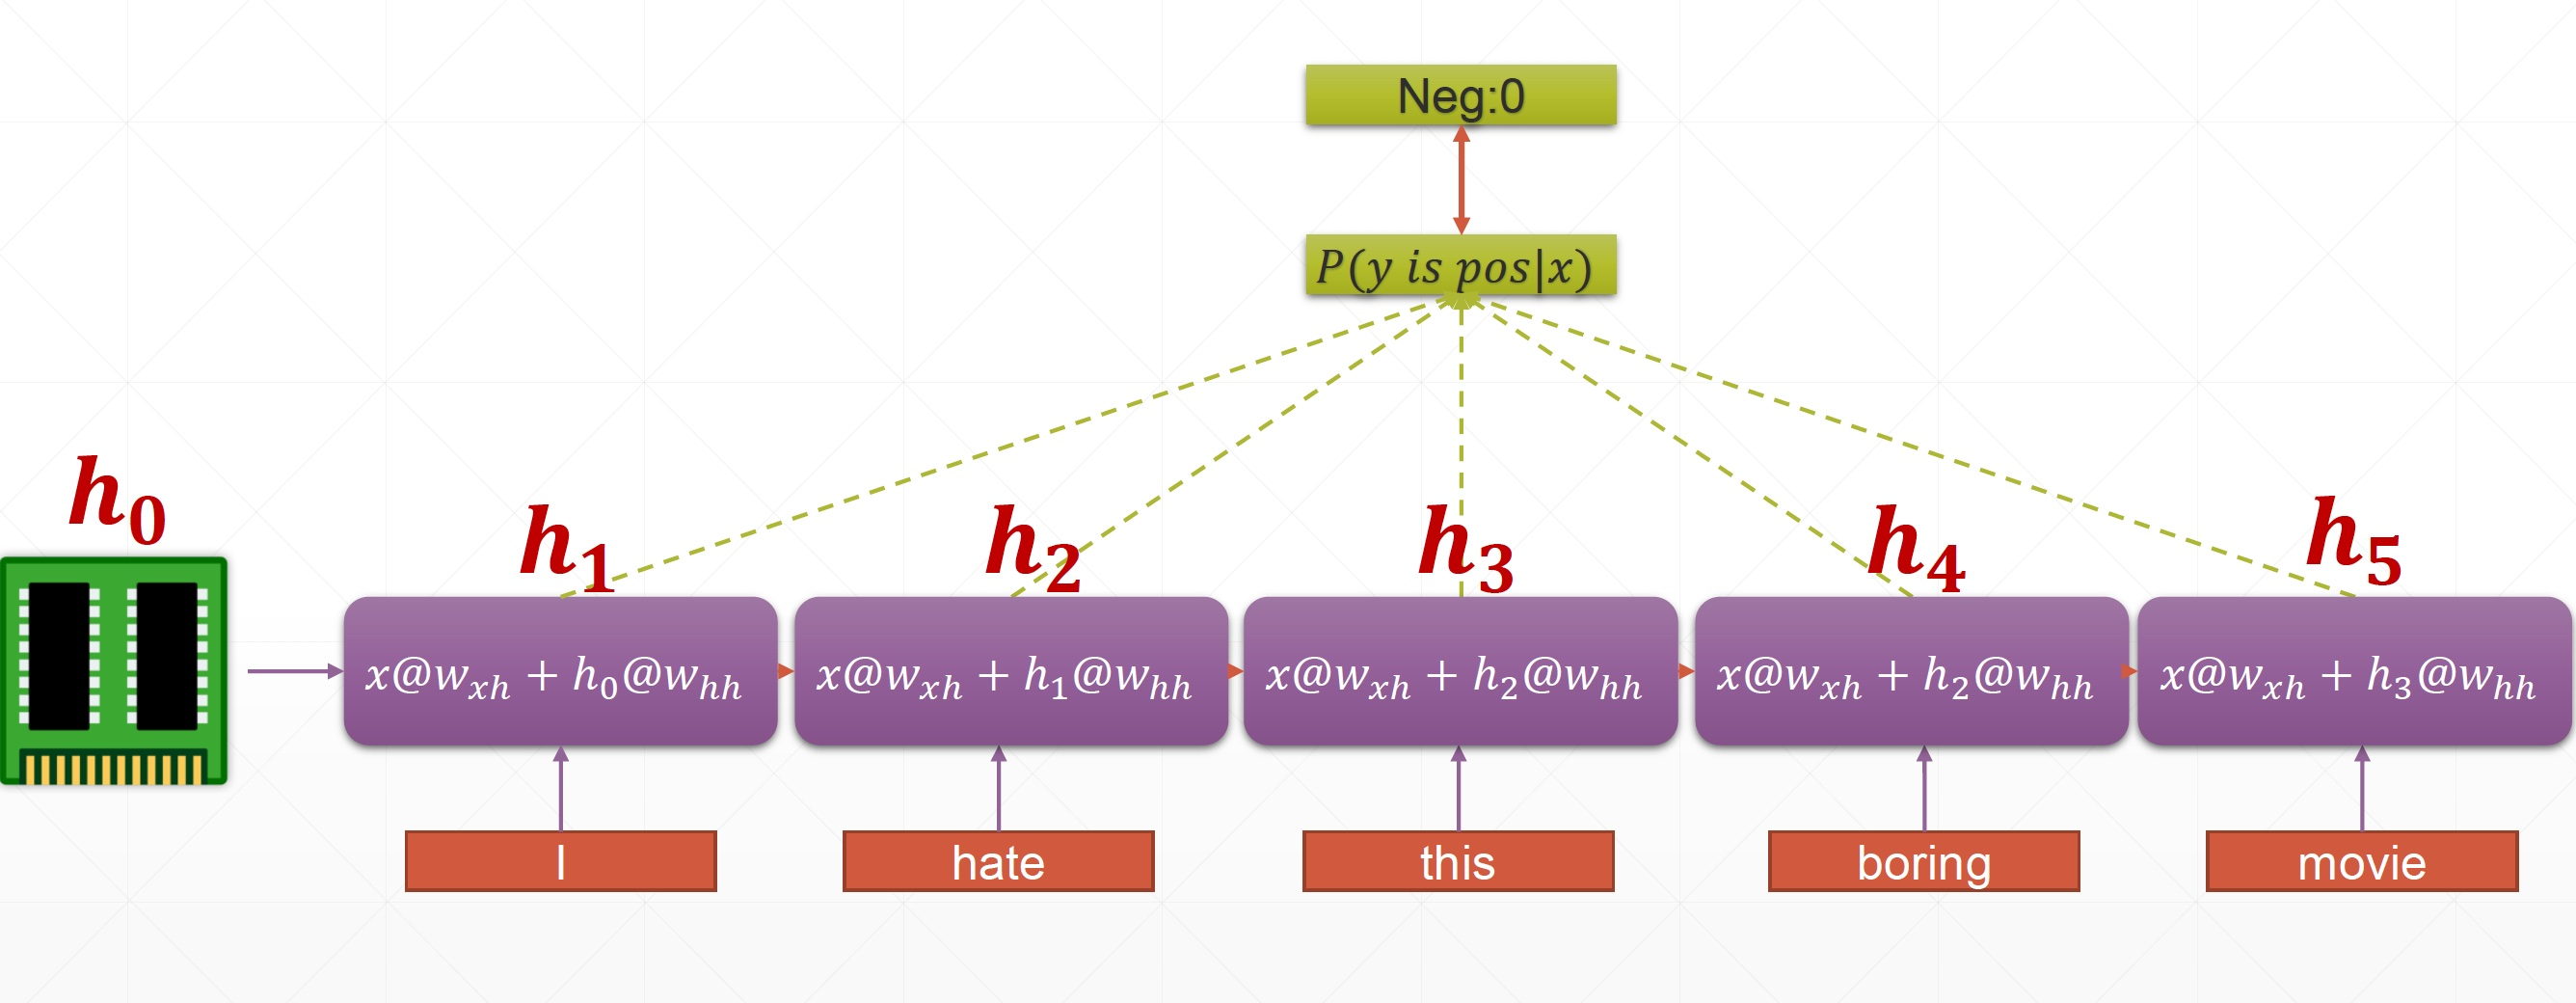

# **Importing Necessary Libraries**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.utils import plot_model
from keras.utils import pad_sequences

# **Loading Data**

In [2]:
from keras.datasets import imdb
num_words = 10000
#(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
(x_train, y_train), (x_test,y_test) = imdb.load_data()

In [3]:
print(' Training shape: ' , x_train.shape, y_train.shape)
print(' Test shape: ' , x_test.shape, y_test.shape)

 Training shape:  (25000,) (25000,)
 Test shape:  (25000,) (25000,)


In [4]:
print('Review :', x_train[0])
print('Label:', y_train[0])

Review : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1


In [5]:

word_index = imdb.get_word_index()
first_20_items = (list(word_index.items()))[:20]
for item in first_20_items:
  print(item)

('fawn', 34701)
('tsukino', 52006)
('nunnery', 52007)
('sonja', 16816)
('vani', 63951)
('woods', 1408)
('spiders', 16115)
('hanging', 2345)
('woody', 2289)
('trawling', 52008)
("hold's", 52009)
('comically', 11307)
('localized', 40830)
('disobeying', 30568)
("'royale", 52010)
("harpo's", 40831)
('canet', 52011)
('aileen', 19313)
('acurately', 52012)
("diplomat's", 52013)


In [6]:
np.array(x_train.max()).max()

88325

In [7]:
print(x_train[5])
print(len(x_train[5]))

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 43222, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 86588, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 15344, 10, 10]
43


In [8]:
for ix in range(11):
  print(f'length Timesteps:{ix}', len(x_train[ix]))

length Timesteps:0 218
length Timesteps:1 189
length Timesteps:2 141
length Timesteps:3 550
length Timesteps:4 147
length Timesteps:5 43
length Timesteps:6 123
length Timesteps:7 562
length Timesteps:8 233
length Timesteps:9 130
length Timesteps:10 450


It is a preprocessed data. As the tokonization is done.
But, The input length is different. So Padding is required.

### **Zero Padding**
**Fixed Input Length:** Many machine learning models, especially neural networks, require fixed-length inputs. However, text data can vary in length. By zero-padding or adding zeros to shorter sequences, you ensure that all input sequences have the same length, which is essential for training neural networks and other models.

In [9]:
max_len=[]
for ix in range(x_train.shape[0]):
  #print(f'length Timesteps:{ix}', len(x_train[ix]))
  max_len.append(len(x_train[ix]))
time_step = np.array(max_len).max()
time_step # total vocab in the longest sentence.

2494

In [10]:
# For fixed input length Padding Required
from keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post')
x_test  = pad_sequences(x_test, padding='post')
for ix in range(11):
  print(f'length Timesteps:{ix}', len(x_train[ix]))

length Timesteps:0 2494
length Timesteps:1 2494
length Timesteps:2 2494
length Timesteps:3 2494
length Timesteps:4 2494
length Timesteps:5 2494
length Timesteps:6 2494
length Timesteps:7 2494
length Timesteps:8 2494
length Timesteps:9 2494
length Timesteps:10 2494


For tasks like text classification or sentiment analysis, shorter sequences might be adequate. So We can do reduction for simplicity although we will loose information.

*Real Time shortening of sequence length is not advisible

In [11]:
new_time_step =200
x_train = pad_sequences(x_train, padding='post', maxlen= new_time_step)
x_test  = pad_sequences(x_test, padding='post', maxlen= new_time_step)
for ix in range(11):
  print(f'length Timesteps:{ix}', len(x_train[ix]))

length Timesteps:0 200
length Timesteps:1 200
length Timesteps:2 200
length Timesteps:3 200
length Timesteps:4 200
length Timesteps:5 200
length Timesteps:6 200
length Timesteps:7 200
length Timesteps:8 200
length Timesteps:9 200
length Timesteps:10 200


In [12]:
word_index = imdb.get_word_index()
len(word_index)


88584

In [13]:
len(x_train[0])

200

<Axes: xlabel='0'>

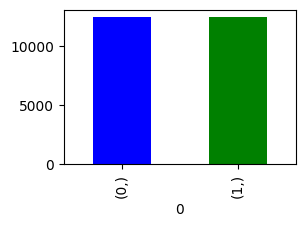

In [14]:
pd.DataFrame(y_train).value_counts().plot(kind='bar', color=['blue','green'], figsize=(3,2))

# **Approach : 1 (Simple RNN using Integer Coding)**

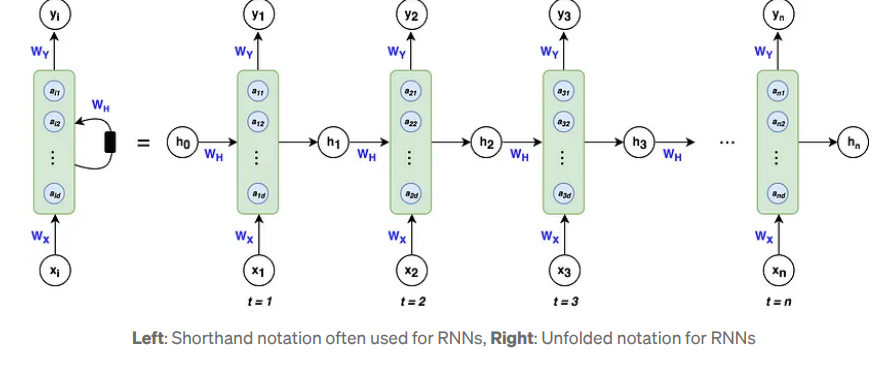

In [15]:
timesteps = len(x_train[0])
max_vocab = num_words
print('Timesteps :',timesteps )
print('Maximum vocabs :',num_words )

Timesteps : 200
Maximum vocabs : 10000


In [16]:
# Simple RNN
model = Sequential([
    SimpleRNN(8, input_shape=(timesteps,1), return_sequences=False),
    # This is Many to one RNN problem: Sentiment Analysis -
    # 'return_sequences=False', Desired Output is only at the end.
    Dense(1,activation ='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 80        
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89 (356.00 Byte)
Trainable params: 89 (356.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'] )
history = model.fit(x_train, y_train, batch_size=128,epochs = 5, validation_data = (x_test,y_test))

Epoch 1/5
196/196 [==============================] - 33s 145ms/step - loss: 0.6938 - accuracy: 0.4957 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/5
196/196 [==============================] - 26s 132ms/step - loss: 0.6933 - accuracy: 0.4979 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
196/196 [==============================] - 26s 131ms/step - loss: 0.6933 - accuracy: 0.4978 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
196/196 [==============================] - 28s 144ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
196/196 [==============================] - 26s 133ms/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5000


<Axes: >

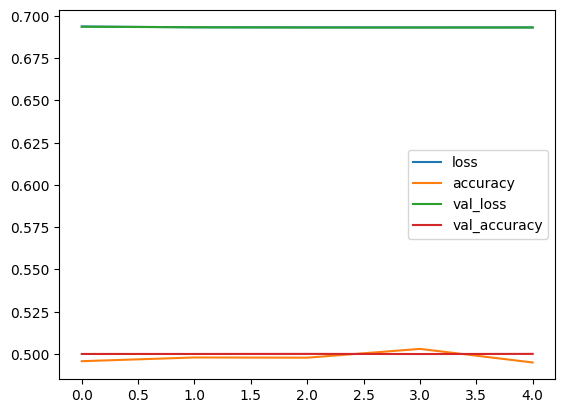

In [18]:
rnn_history =pd.DataFrame(model.history.history)
rnn_history.plot()

#### **> Cons of Integer Encoding**
- Lack of Semantic Information: Integer encoding does not capture the semantic relationships between words. Similar words do not have similar integer values, and the numerical representation doesn't reflect the meaning of words.

- Dimensionality: Integer encoding can lead to high-dimensional input data when applied to a large vocabulary, which can be problematic for some machine learning models and require dimensionality reduction techniques.

- Loss of OOV (Out of Vocabulary) Information: If a word in the test data is not present in the training data, it cannot be represented using integer encoding unless you introduce special handling for out-of-vocabulary words.

- Ordering Ambiguity: The order in which words are assigned integers doesn't carry any specific meaning. This means that similar words might not necessarily have similar integer values.

- Limited to Categorical Data: Integer encoding is primarily designed for categorical text data. It may not be suitable for other types of data, such as numerical or continuous data.

- Difficulty Handling Polysemy: Words with multiple meanings (polysemous words) can only have one integer value in this representation, which may lead to ambiguity in some contexts.

# **Approach-2: (Simple RNN using Embedding)**

In [19]:
num_words = 10000
maxlen = 100
embedding_dim =32
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
max_sequence_length = len(x_train[0])
print('Input Dim :', num_words)
print('Output Dim :', embedding_dim)
print('Input length :', max_sequence_length)

Input Dim : 10000
Output Dim : 32
Input length : 100


In [20]:
model_em = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    SimpleRNN(8, return_sequences= False),
    Dense(1,activation ='sigmoid')
])
model_em.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 320337 (1.22 MB)
Trainable params: 320337 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_em.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = model_em.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Epoch 1/5
782/782 [==============================] - 111s 138ms/step - loss: 0.6601 - accuracy: 0.5824 - val_loss: 0.5860 - val_accuracy: 0.6765
Epoch 2/5
782/782 [==============================] - 83s 106ms/step - loss: 0.4326 - accuracy: 0.8040 - val_loss: 0.4404 - val_accuracy: 0.8072
Epoch 3/5
782/782 [==============================] - 82s 105ms/step - loss: 0.2739 - accuracy: 0.8938 - val_loss: 0.4410 - val_accuracy: 0.8217
Epoch 4/5
782/782 [==============================] - 82s 105ms/step - loss: 0.1787 - accuracy: 0.9377 - val_loss: 0.4987 - val_accuracy: 0.7985
Epoch 5/5
782/782 [==============================] - 83s 106ms/step - loss: 0.1214 - accuracy: 0.9602 - val_loss: 0.5727 - val_accuracy: 0.7801


<Axes: >

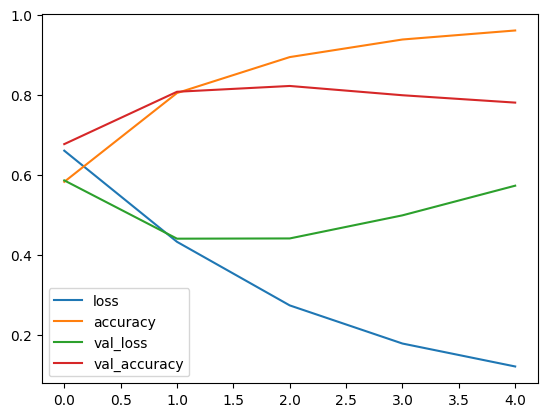

In [22]:
rnn_history =pd.DataFrame(model_em.history.history)
rnn_history.plot()

#### **Basic RNN face following challenges:**
We update the weights to minimize loss.
- Vanishing Gradient Problem.
- Learning Long Term Dependencies.
- Exploding Gradient Problem.
- RNN is expensive to train.
##### **Solution to above problem**
- Using different activation funcion (ReLu, Leaky ReLu)
- Better weight initialisation
- controlling learning rate
- **Using LSTM / GRU** - most preferred one

# **Approach-3: LSTM(Long Short Term Memory)**
LSTM invented to solve the RNN issues by explicitily introducing a memory unit cell into the network. It excels at capturing long-term dependencies, making it ideal for sequence prediction tasks.
LSTM Recurrent Unit is composed of Long Term Memory(LTM) unit and Short Term Memory Unit(STM).
- Cell State (LTM) : Retains Value over arbitary interval of time
- STM : acts as conveyor belt that carries information through each time steps. It can be modified by 3 main gates.
> - Forget Gate : determines what percentage of information to keep and throw
> - Input Gate : what new info to be added/ updated to cell state
> - Output Gate



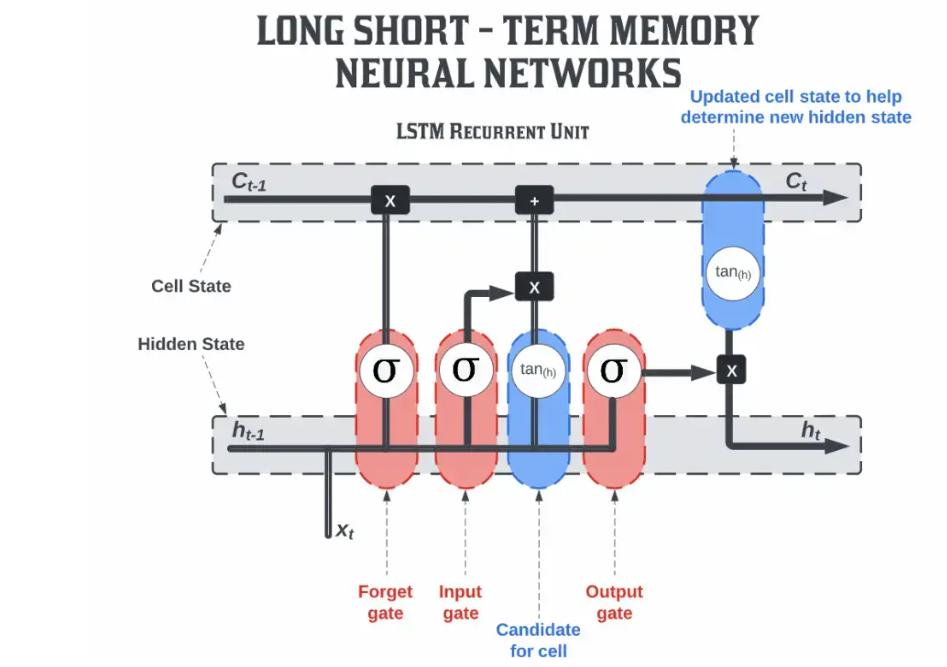

In [23]:
num_words = 10000
maxlen = 100
embedding_dim =32
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
max_sequence_length = len(x_train[0])
print('Input Dim :', num_words)
print('Output Dim :', embedding_dim)
print('Input length :', max_sequence_length)

Input Dim : 10000
Output Dim : 32
Input length : 100


In [24]:
lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(10, return_sequences= False),  # In Deep RNN we need all outputs.
    Dense(1,activation ='sigmoid')
])
lstm.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = lstm.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Epoch 1/5
782/782 [==============================] - 28s 33ms/step - loss: 0.4363 - accuracy: 0.7948 - val_loss: 0.3500 - val_accuracy: 0.8471
Epoch 2/5
782/782 [==============================] - 10s 13ms/step - loss: 0.2682 - accuracy: 0.8925 - val_loss: 0.3543 - val_accuracy: 0.8448
Epoch 3/5
782/782 [==============================] - 12s 15ms/step - loss: 0.2047 - accuracy: 0.9226 - val_loss: 0.3989 - val_accuracy: 0.8402
Epoch 4/5
782/782 [==============================] - 12s 15ms/step - loss: 0.1600 - accuracy: 0.9424 - val_loss: 0.4665 - val_accuracy: 0.8361
Epoch 5/5
782/782 [==============================] - 11s 14ms/step - loss: 0.1276 - accuracy: 0.9530 - val_loss: 0.5486 - val_accuracy: 0.8318


<Axes: >

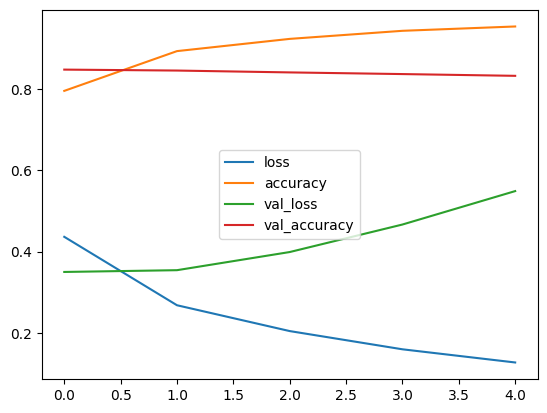

In [25]:
rnn_history =pd.DataFrame(lstm.history.history)
rnn_history.plot()

# **Approach-4: GRU(Gated Recurrent Unit)**

In [26]:
gru = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    GRU(5, return_sequences= False),  # In Deep RNN we need all outputs.
    Dense(1,activation ='sigmoid')
])
gru.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = gru.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Epoch 1/5
782/782 [==============================] - 28s 32ms/step - loss: 0.4739 - accuracy: 0.7662 - val_loss: 0.3706 - val_accuracy: 0.8416
Epoch 2/5
782/782 [==============================] - 10s 13ms/step - loss: 0.2928 - accuracy: 0.8830 - val_loss: 0.3616 - val_accuracy: 0.8453
Epoch 3/5
782/782 [==============================] - 10s 13ms/step - loss: 0.2216 - accuracy: 0.9178 - val_loss: 0.3999 - val_accuracy: 0.8378
Epoch 4/5
782/782 [==============================] - 9s 11ms/step - loss: 0.1742 - accuracy: 0.9380 - val_loss: 0.3982 - val_accuracy: 0.8399
Epoch 5/5
782/782 [==============================] - 12s 15ms/step - loss: 0.1342 - accuracy: 0.9552 - val_loss: 0.4604 - val_accuracy: 0.8335


<Axes: >

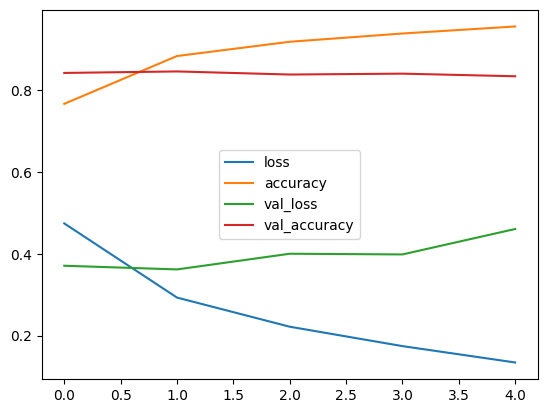

In [27]:
rnn_history =pd.DataFrame(gru.history.history)
rnn_history.plot()

# **Approach-5:Deep RNN**

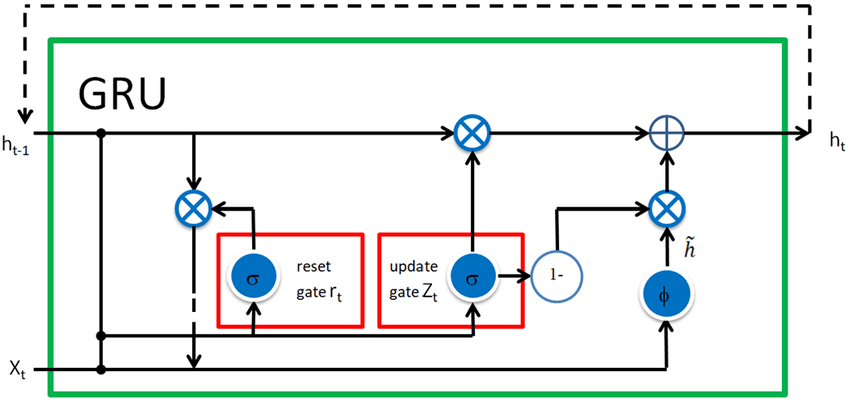

In [28]:
deep_rnn = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    SimpleRNN(5, return_sequences= True),  # In Deep RNN we need all outputs.
    SimpleRNN(5),
    Dense(1,activation ='sigmoid')
])
deep_rnn.summary()
deep_rnn.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = deep_rnn.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 32)           320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100, 5)            190       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320251 (1.22 MB)
Trainable params: 320251 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 186s 233ms/step - loss: 0.6790 - accuracy: 0.5944 - val_loss: 0.7828 - val_accuracy: 0.5184
Epoch

<Axes: >

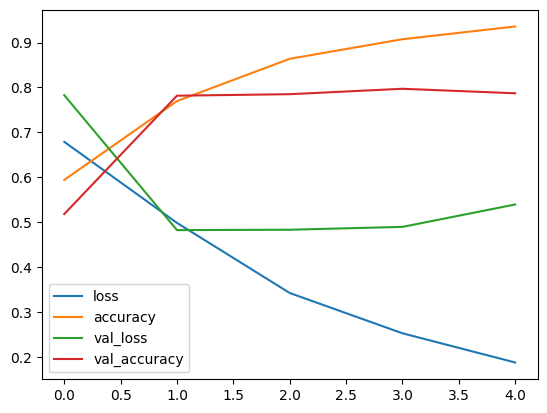

In [29]:
rnn_history =pd.DataFrame(deep_rnn.history.history)
rnn_history.plot()

# **Approach-6: Deep LSTM**

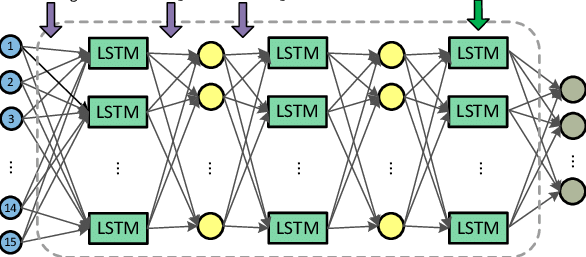

In [30]:
deep_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(10, return_sequences= True),  # In Deep LSTM we need all outputs. Default option = True
    LSTM(10),
    Dense(1,activation ='sigmoid')
])
deep_lstm.summary()
deep_lstm.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history =deep_lstm.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 100, 10)           1720      
                                                                 
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 322571 (1.23 MB)
Trainable params: 322571 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 34s 39ms/step - loss: 0.4352 - accuracy: 0.7935 - val_loss: 0.3435 - val_accuracy: 0.8497
Epoch 2

<Axes: >

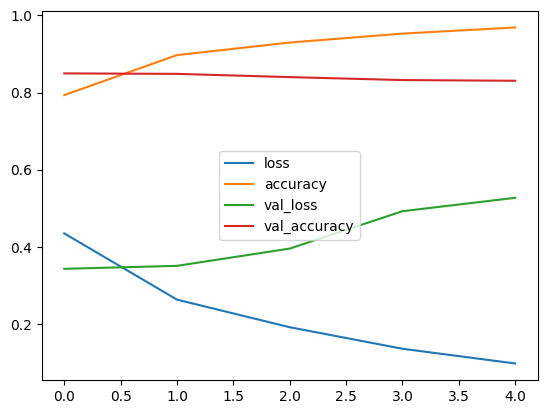

In [31]:
rnn_history =pd.DataFrame(deep_lstm.history.history)
rnn_history.plot()

# **Approach-7: Deep GRU**

In [32]:
deep_gru = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    GRU(10, return_sequences= True),  # In Deep RNN we need all outputs.
    GRU(5),
    Dense(1,activation ='sigmoid')
])
deep_gru.summary()
deep_gru.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = deep_gru.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 32)           320000    
                                                                 
 gru_1 (GRU)                 (None, 100, 10)           1320      
                                                                 
 gru_2 (GRU)                 (None, 5)                 255       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 321581 (1.23 MB)
Trainable params: 321581 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 33s 37ms/step - loss: 0.4582 - accuracy: 0.7760 - val_loss: 0.3561 - val_accuracy: 0.8476
Epoch 2

<Axes: >

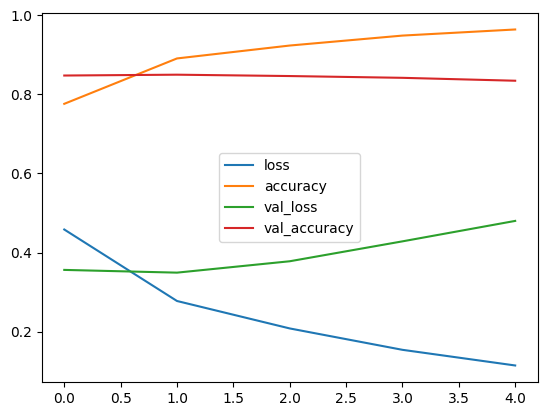

In [33]:
rnn_history =pd.DataFrame(deep_gru.history.history)
rnn_history.plot()

# **Approach-7a: Deep GRU with dropout**

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 gru_3 (GRU)                 (None, 100, 10)           1320      
                                                                 
 dropout_1 (Dropout)         (None, 100, 10)           0         
                                                                 
 gru_4 (GRU)                 (None, 5)                 255       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                

<Axes: >

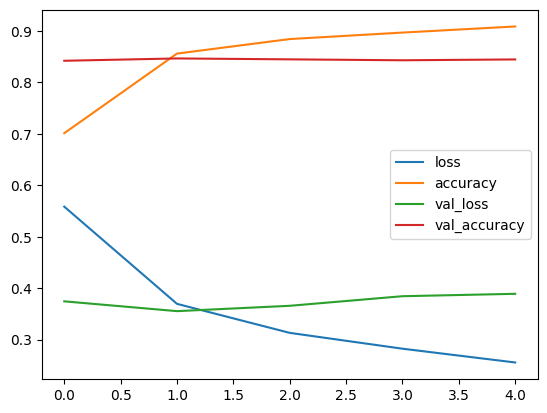

In [34]:
deep_gru1 = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Dropout(0.5),
    GRU(10, return_sequences= True),  # In Deep RNN we need all outputs.
    Dropout(0.5),
    GRU(5),
    Dropout(0.5),
    Dense(1,activation ='sigmoid')
])
deep_gru1.summary()
deep_gru1.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = deep_gru1.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))
rnn_history =pd.DataFrame(deep_gru1.history.history)
rnn_history.plot()

# **Approach 8: Bi-Directional LSTM**

A Bidirectional Recurrent Neural Network (BRNN)is a type of recurrent neural network (RNN) architecture that processes input data in both forward and backward directions. In a traditional unidirectional RNN, the information flows only from past to future, making predictions based on the preceding context. However, in bidirectional RNNs, the network also considers future context, enabling it to capture dependencies in both directions.
This allows BRNNs to capture information from both past and future contexts, making them particularly effective for tasks that require a more comprehensive understanding of sequential data.










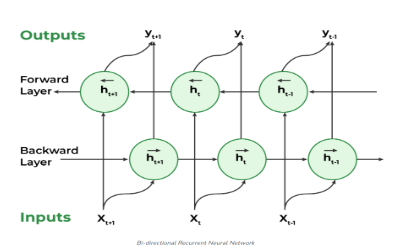

In [35]:

x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test,maxlen=100)
maxlen = len(x_train[0])
maxlen

100

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 32)           320000    
                                                                 
 bidirectional (Bidirection  (None, 100, 10)           1520      
 al)                                                             
                                                                 
 gru_5 (GRU)                 (None, 5)                 255       
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 321781 (1.23 MB)
Trainable params: 321781 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
782/782 [==============================] - 38s 42ms/step - loss: 0.4459 - 

<Axes: >

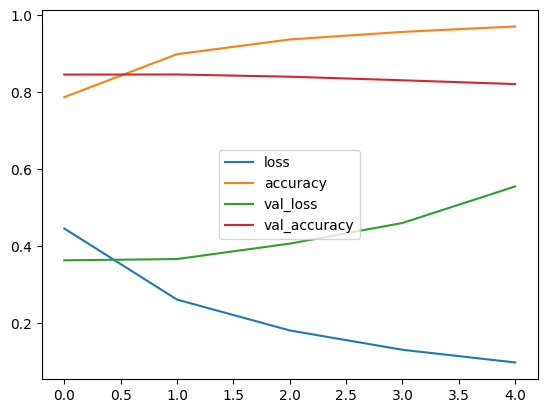

In [36]:
# Bi directional LSTM
bd_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Bidirectional(LSTM(5, return_sequences= True)),  # In Bi Directional RNN we need all outputs.
    GRU(5),
    Dense(1,activation ='sigmoid')
])

bd_lstm.summary()
bd_lstm.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = bd_lstm.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))
rnn_history =pd.DataFrame(bd_lstm.history.history)
rnn_history.plot()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 32)           320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 10)           1520      
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 100, 10)           0         
                                                                 
 gru_6 (GRU)                 (None, 5)                 255       
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                      

<Axes: >

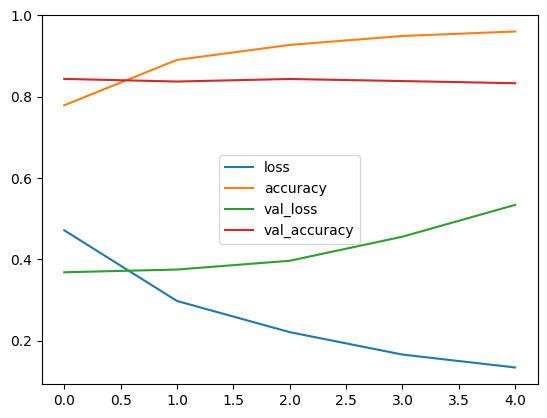

In [37]:
bd_lstm1 = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Bidirectional(LSTM(5, return_sequences= True)),  # In Bi Directional RNN we need all outputs.
    Dropout(0.3),
    GRU(5),
    Dropout(0.3),
    Dense(1,activation ='sigmoid')
])

bd_lstm1.summary()
bd_lstm1.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = bd_lstm1.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))
rnn_history =pd.DataFrame(bd_lstm1.history.history)
rnn_history.plot()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 32)           320000    
                                                                 
 dropout_5 (Dropout)         (None, 100, 32)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 100, 10)           1520      
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 100, 10)           0         
                                                                 
 gru_7 (GRU)                 (None, 5)                 255       
                                                                 
 dropout_7 (Dropout)         (None, 5)                 0         
                                                     

<Axes: >

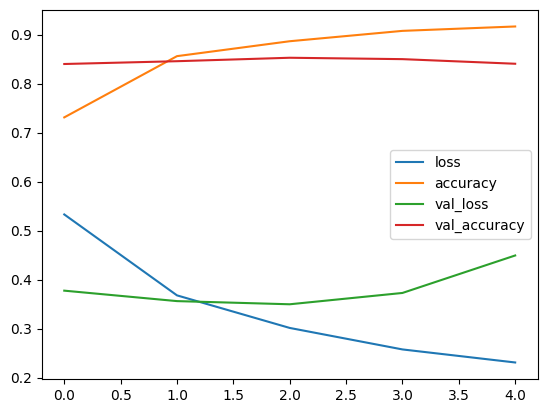

In [38]:

bd_lstm2 = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Dropout(0.5),
    Bidirectional(LSTM(5, return_sequences= True)),  # In Bi Directional RNN we need all outputs.
    Dropout(0.5),
    GRU(5),
    Dropout(0.5),
    Dense(1,activation ='sigmoid')
])

bd_lstm2.summary()
bd_lstm2.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'] )
history = bd_lstm2.fit(x_train, y_train, epochs = 5,batch_size=32, validation_data = (x_test,y_test))
rnn_history =pd.DataFrame(bd_lstm2.history.history)
rnn_history.plot()